In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(0)

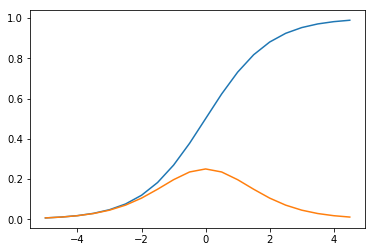

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoidPrime(x):
    return sigmoid(x) * (1-sigmoid(x))

t = np.arange(-5., 5., 0.5)
plt.plot(t, sigmoid(t))
plt.plot(t, sigmoidPrime(t))
plt.show()

In [4]:
#Read data from fie
data = np.genfromtxt("breast-cancer.data", delimiter=",", missing_values="?", filling_values=1.)

#Separate the X
dataX = data[:, 1:-1]
#Separate the Y
pre_dataY = data[:, -1]
#Convert the Y to one hot
dataY = np.zeros((pre_dataY.size, 2))

for i in range(len(pre_dataY)):
    if pre_dataY[i] == 2:
        dataY[i][0] = 1
    else:
        dataY[i][1] = 1

In [5]:
#Mix up the data
permutation = np.random.permutation(dataX.shape[0])
dataX = dataX[permutation]
dataY = dataY[permutation]

In [6]:
#Set network variables and hyperparameters
nIn = 9
nHidden = 25
nOut = 2
alpha = 0.01
nEpochs = 1500
testSplit = 0.15

In [7]:
#Forward propogation
def nn_forward(X, W1, W2):
    x = X.reshape(-1, nIn)
    
    layer2 = np.dot(x, W1)
    layer2 = sigmoid(layer2)
    
    out = np.dot(layer2, W2)
    out = sigmoid(out)
    
    return out

In [8]:
#Network training
def train(X, Y, W1, W2):
    #Forward propogation
    x = X.reshape(-1, nIn)
    Y = Y.reshape(-1, nOut)
    
    layer2 = np.dot(x, W1)
    a_layer2 = sigmoid(layer2)
    
    out = np.dot(a_layer2, W2)
    a_out = sigmoid(out)
    
    #Check if prediction is correct
    if np.argmax(a_out) == np.argmax(Y):
        accuracy = 1
    else:
        accuracy = 0
    
    #Calculate loss
    loss = np.sum(0.5 * (Y - a_out) ** 2)
    
    #Backpropogate
    delta_loss = (Y - a_out) * -sigmoidPrime(out)
    delta_W2 = np.dot(layer2.T, delta_loss)
    
    delta_loss = np.dot(delta_loss, W2.T) * sigmoidPrime(layer2)
    delta_W1 = np.dot(X.T.reshape(nIn, 1), delta_loss)
    
    #Update weights
    W2 = W2 - alpha * delta_W2
    W1 = W1 - alpha * delta_W1
    
    return W1, W2, loss, accuracy

In [9]:
#Initialize weights
losses = []
W1 = np.random.rand(nIn, nHidden) * 0.5
W2 = np.random.rand(nHidden, nOut) * 0.5

In [10]:
#Number of data points used for testing
num_test = int(testSplit * len(data))

#Split data into train and test
trainX = dataX[:-num_test]
testX = dataX[-num_test:]

trainY = dataY[:-num_test]
testY = dataY[-num_test:]

In [11]:
#Training loop
correct = 0
for j in range(nEpochs):
    for i in range(trainX.shape[0]):
        W1, W2, loss, c = train(trainX[i], trainY[i], W1, W2)
        correct += c
    #Print an update on loss and accuracy
    if j % 50 == 0:
        accuracy = correct / (50 * trainX.shape[0])
        print("Epoch {} Loss: {}\n\tAccuracy: {}".format(j, loss, accuracy))
        correct = 0
        total = 0
    #Track the loss history
    if j % 5 == 0:
        losses.append(loss)

Epoch 0 Loss: 0.4847098910054156
	Accuracy: 0.007092436974789916
Epoch 50 Loss: 0.30322289160649785
	Accuracy: 0.6586890756302521
Epoch 100 Loss: 0.24353958179938356
	Accuracy: 0.49747899159663866
Epoch 150 Loss: 0.26583679427839174
	Accuracy: 0.40349579831932775
Epoch 200 Loss: 0.2821217976288522
	Accuracy: 0.4353613445378151
Epoch 250 Loss: 0.5742622629053697
	Accuracy: 0.6319663865546219
Epoch 300 Loss: 0.0021346352666951405
	Accuracy: 0.9462857142857143
Epoch 350 Loss: 0.00021207374934761257
	Accuracy: 0.9525714285714286
Epoch 400 Loss: 0.0008383904984590718
	Accuracy: 0.9408403361344538
Epoch 450 Loss: 0.004688880993009483
	Accuracy: 0.9591932773109244
Epoch 500 Loss: 0.02304562973032761
	Accuracy: 0.9451764705882353
Epoch 550 Loss: 0.0013342131440245123
	Accuracy: 0.8669915966386554
Epoch 600 Loss: 0.0023324950910996725
	Accuracy: 0.9472268907563025
Epoch 650 Loss: 0.002296559167903758
	Accuracy: 0.9442352941176471
Epoch 700 Loss: 0.003947523500371873
	Accuracy: 0.935260504201680

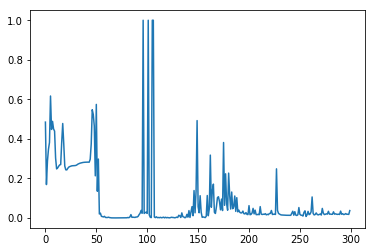

In [12]:
#Plot the losses
plt.plot(losses)
plt.show()

In [13]:
correct = 0
total = len(testX)

#Calculate the accuracy
for i in range(total):
    pred = np.argmax(nn_forward(testX[i], W1, W2))+1
    actual = np.argmax(testY[i])+1
    
    #print("Prediction: Type {}".format(pred))
    #print("Actual: Type {}\n".format(actual))
    
    if pred == actual:
        correct += 1
    
print("Accuracy: {}%".format(correct/total))

Accuracy: 0.9711538461538461%
